<a href="https://colab.research.google.com/github/yukiharada1228/neural_network/blob/main/BERT%E3%81%AE%E5%88%A9%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip -q install transformers fugashi ipadic japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 40.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [10]:
from transformers import AutoModel, AutoTokenizer
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.manifold import TSNE
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
# 事前学習済みモデルの読み込み
tokenizer = AutoTokenizer.from_pretrained("cl-tohoku/bert-base-japanese")
model = AutoModel.from_pretrained("cl-tohoku/bert-base-japanese")

Some weights of the model checkpoint at cl-tohoku/bert-base-japanese were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:
# 変換する文章をリストで定義
texts = [
    "丸善の商品は定価よりも高かったりしますか？",
    "授業の退出時にカードリーダーに学生証をタッチし忘れた場合、欠席扱いになりますか？また、授業の担当の先生に連絡した方がいいですか？",
    "中部大学の奨学金って重複して取れるんですか？勉強の三十万円と部活とかの十万円",
    "中部大学にはパソコンのマウスやUSBとかを買える所ありますか？",
    "イケメンがいなくて困ってます．ぴえん．",
    "夜遅くまで勉強したいのですが基本的に何時まで大学に居ても大丈夫でしょうか",
    "相談会などにいってないのですがどうやったらサークルに入れますか",
    "コモンズの使用時間は９時からですが、9時前に入って勉強している人もいます。良いのでしょうか？9時前でもコモンズ3階のコピー機を使ったりし良いんですか",
    "お昼めっちゃ混んでてビビってます。なにたべましたか？",
    "担当してる教授がどんな研究をしているか知りたいんですがどうやって調べられますか？",
    "彼女と別れて友達もなんか違うなあって思えてきてまわりの話を聞いたり見たりして自分の人生なにも他の人よりこれ！っていうものなかったことに気づいて途方に暮れてますす。どうしたらネガティブな感情なくなりますか？",
    "ロッカーを使用している方のほとんどがダイアル式なんですがいいんでしょうか？",
    "履修追加したときの連絡って、直接会って追加したのでよろしくお願いしますって言いに行くのは迷惑ですか？",
    "スマホの充電ができる場所ってあったりしますか？",
    "必修じゃない専門科目って取らないとやばいですかね？",
    "昨日一限で朝行ったときバス混んでたんですが　あれ毎日なんですかね",
    "中部大学にお風呂とかってあるんですか？",
    "中部大学で留学生向けの日本語教育プログラムはありますか？",
    "キャンパス内で買い物ができる場所はありますか？また、近隣にスーパーなどのお店はありますか？",
    "中部大学の図書館は24時間開館していますか？",
    "中部大学で学生によるボランティア活動は盛んですか？",
    "中部大学には学生寮がありますか？また、近隣に住む場合、家賃はどのくらいですか？",
    "中部大学には留学生交流のためのクラブやイベントはありますか？",
    "中部大学の卒業生はどのような就職先に進んでいますか？",
    "大学のサークル活動にはどのような種類がありますか？",
    "中部大学で行われている研究分野について、特に注目すべきものはありますか？",
    "中部大学のキャンパス内には、どのようなスポーツ施設がありますか？",
    "中部大学のキャンパス周辺には、どのような飲食店やショッピング施設がありますか？",
    "大学の授業では、どのような教育方法が用いられていますか？",
    "中部大学には、留学生が日本語を学ぶための講座やプログラムがありますか？",
    "大学生活でのアルバイト探しのコツはありますか？",
    "大学の学食には、どのような種類の料理があるのでしょうか？",
    "大学には、どのような図書館がありますか？また、貸し出しの制度や利用時間について教えてください。",
    "中部大学のキャンパス内には、どのような芸術・文化施設がありますか？",
    "中部大学では、どのようなスポーツやクラブ活動が盛んですか？",
    "大学生活での運動不足対策におすすめのスポーツやエクササイズはありますか？",
    "大学の授業で使われるテキストや参考書は、どこで購入するのがおすすめですか？",
    "中部大学には、どのような国際交流のイベントやプログラムがあるのでしょうか？",
    "大学生活での交友関係の作り方や維持のコツはありますか？",
    "大学生活での健康管理におすすめの方法や注意点はありますか？",
    "中部大学には、どのような研究室がありますか？また、研究室見学の方法について教えてください。",
    "大学生活でのストレス解消法やリラックス法はありますか？",
]

# 特徴ベクトルを取得
features_list = []
for text in tqdm(texts):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    features = outputs.last_hidden_state.mean(dim=1).squeeze().detach().numpy()
    # ノルムを1に正規化
    features_norm = np.linalg.norm(features)
    if features_norm > 0:
        features = features / features_norm
    features_list.append(features)

# 特徴ベクトルをnumpy配列に変換
features_array = np.array(features_list)

# 重心を計算
center = features_array.mean(axis=0)

# 特徴量と中心点のコサイン類似度を計算
similarities = cosine_similarity(features_array, center.reshape(1, -1)).flatten()

# 類似度が高い順にデータをソート
sorted_indices = similarities.argsort()[::-1]

for i, text in enumerate(np.array(texts)[sorted_indices]):
    print(f'No.{i}: {text}')

100%|██████████| 42/42 [00:05<00:00,  7.12it/s]

No.0: 中部大学には、どのような研究室がありますか？また、研究室見学の方法について教えてください。
No.1: 中部大学には学生寮がありますか？また、近隣に住む場合、家賃はどのくらいですか？
No.2: 中部大学では、どのようなスポーツやクラブ活動が盛んですか？
No.3: 大学には、どのような図書館がありますか？また、貸し出しの制度や利用時間について教えてください。
No.4: 中部大学には、どのような国際交流のイベントやプログラムがあるのでしょうか？
No.5: 大学の授業で使われるテキストや参考書は、どこで購入するのがおすすめですか？
No.6: 中部大学のキャンパス周辺には、どのような飲食店やショッピング施設がありますか？
No.7: 中部大学には、留学生が日本語を学ぶための講座やプログラムがありますか？
No.8: コモンズの使用時間は９時からですが、9時前に入って勉強している人もいます。良いのでしょうか？9時前でもコモンズ3階のコピー機を使ったりし良いんですか
No.9: 中部大学のキャンパス内には、どのようなスポーツ施設がありますか？
No.10: 中部大学のキャンパス内には、どのような芸術・文化施設がありますか？
No.11: 中部大学にはパソコンのマウスやUSBとかを買える所ありますか？
No.12: キャンパス内で買い物ができる場所はありますか？また、近隣にスーパーなどのお店はありますか？
No.13: 大学生活でのストレス解消法やリラックス法はありますか？
No.14: 中部大学には留学生交流のためのクラブやイベントはありますか？
No.15: 担当してる教授がどんな研究をしているか知りたいんですがどうやって調べられますか？
No.16: 大学の学食には、どのような種類の料理があるのでしょうか？
No.17: 中部大学で学生によるボランティア活動は盛んですか？
No.18: 大学生活でのアルバイト探しのコツはありますか？
No.19: ロッカーを使用している方のほとんどがダイアル式なんですがいいんでしょうか？
No.20: 授業の退出時にカードリーダーに学生証をタッチし忘れた場合、欠席扱いになりますか？また、授業の担当の先生に連絡した方がいいですか？
No.21: 大学生活での運動不足対策におすすめのスポーツやエクササイズはありますか？
N

In [7]:
# T-SNEによる次元圧縮 
features_list.append(center)
tsne = TSNE(n_components=2) # n_componentsは低次元データの次元数
features_tsne = tsne.fit_transform(np.array(features_list))

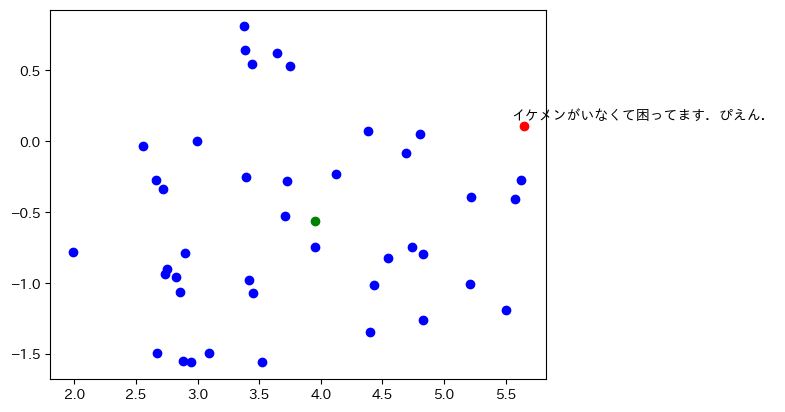

In [11]:
for i in range(len(features_list)-1):
    plt.scatter(
        features_tsne[i, 0],
        features_tsne[i, 1],
        color="blue" if i != sorted_indices[-1] else "red")
plt.scatter(
        features_tsne[len(features_list)-1, 0],
        features_tsne[len(features_list)-1, 1],
        color="green")
plt.text(
    features_tsne[sorted_indices[-1], 0] - 0.1,
    features_tsne[sorted_indices[-1], 1] + 0.05,
    texts[sorted_indices[-1]],
    color="black")
plt.show()